In [1]:
import ROOT as r
import ctypes
import numpy as np
from array import array
import root_numpy as rn
import matplotlib.pyplot as plt

/home/hep/davide/miniconda3/envs/root_env/lib/ROOT.py:301: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility
  return _orig_ihook( name, *args, **kwds )


In [2]:
l_flv = ['e','mu']
data_type = ['MC','small_data']
mag_status =['Up','Down'] 
tree_name = 'Ds_OfflineTree/DecayTree'

In [3]:
l_index = 1
#data_index = None 
mag_index = 1

In [4]:
def find_file_path(l_index, type_index, mag_index): 
    return "/disk/lhcb_data/davide/Rphipi/"+data_type[type_index]+"/Ds_phipi_"+l_flv[l_index]+l_flv[l_index]+"/Ds_phipi_"+l_flv[l_index]+l_flv[l_index]+"_Mag"+mag_status[mag_index]+".root"
#def find_file_path(l_index, type_index, mag_index): 
#    return "../Desktop/Ds_phipi/"+data_type[i]+"/Ds_phipi_"+l_flv[j]+"/Ds_phipi_"+l_flv[j]+"_"+mag_status[k]+".root"

In [5]:
data_mumu = r.TFile(find_file_path(l_index, 1, mag_index))
MC_mumu = r.TFile(find_file_path(l_index, 0, mag_index))

In [6]:
t_data_mumu = data_mumu.Get("Ds_OfflineTree/DecayTree")
t_data_mumu

<ROOT.TTree object ("DecayTree") at 0x55992fc141a0>

In [7]:
t_MC_mumu = MC_mumu.Get("Ds_OfflineTree/DecayTree")
t_MC_mumu

<ROOT.TTree object ("DecayTree") at 0x55992fcaafa0>

In [8]:
t_data_mumu.SetBranchStatus("*",0)
t_data_mumu.SetBranchStatus("Ds_ENDVERTEX_CHI2",1)
t_data_mumu.SetBranchStatus("Ds_ENDVERTEX_NDOF",1)
t_data_mumu.SetBranchStatus("Ds_OWNPV_CHI2",1)
t_data_mumu.SetBranchStatus("Ds_OWNPV_NDOF",1)
t_data_mumu.SetBranchStatus("Ds_IP_OWNPV",1)
t_data_mumu.SetBranchStatus("Ds_IPCHI2_OWNPV",1)
t_data_mumu.SetBranchStatus("Ds_DIRA_OWNPV",1)
t_data_mumu.SetBranchStatus("Ds_ConsD_M",1)

t_data_mumu.SetBranchStatus("mu_plus_MC15TuneV1_ProbNNmu", 1)
t_data_mumu.SetBranchStatus("Ds_Hlt1TrackMVADecision_TOS", 1)
t_data_mumu.SetBranchStatus("Ds_Hlt2RareCharmD2PiMuMuOSDecision_TOS", 1)
t_data_mumu.SetBranchStatus("Ds_Hlt2Phys_TOS", 1)


t_MC_mumu.SetBranchStatus("*",0)
t_MC_mumu.SetBranchStatus("Ds_ENDVERTEX_CHI2", 1)
t_MC_mumu.SetBranchStatus("Ds_ENDVERTEX_NDOF", 1)
t_MC_mumu.SetBranchStatus("Ds_OWNPV_CHI2", 1)
t_MC_mumu.SetBranchStatus("Ds_OWNPV_NDOF", 1)
t_MC_mumu.SetBranchStatus("Ds_IP_OWNPV", 1)
t_MC_mumu.SetBranchStatus("Ds_IPCHI2_OWNPV", 1)
t_MC_mumu.SetBranchStatus("Ds_DIRA_OWNPV", 1)
t_MC_mumu.SetBranchStatus("Ds_ConsD_M", 1)

t_MC_mumu.SetBranchStatus("mu_plus_MC15TuneV1_ProbNNmu", 1)
t_MC_mumu.SetBranchStatus("Ds_Hlt1TrackMVADecision_TOS", 1)
t_MC_mumu.SetBranchStatus("Ds_Hlt2RareCharmD2PiMuMuOSDecision_TOS", 1)
t_MC_mumu.SetBranchStatus("Ds_Hlt2Phys_TOS", 1)

In [9]:
branches_needed = [
                    "Ds_ENDVERTEX_CHI2",
                    "Ds_ENDVERTEX_NDOF",
                    "Ds_OWNPV_CHI2",
                    "Ds_OWNPV_NDOF",
                    "Ds_IP_OWNPV",
                    "Ds_IPCHI2_OWNPV",
                    "Ds_DIRA_OWNPV",
                    "Ds_ConsD_M",
                    l_flv[l_index]+"_plus_MC15TuneV1_ProbNN"+l_flv[l_index],
                    "Ds_Hlt1TrackMVADecision_TOS",
                    "Ds_Hlt2RareCharmD2PiMuMuOSDecision_TOS",
                    "Ds_Hlt2Phys_TOS",
                  ] 

In [10]:
MC_count=0
for event in enumerate(t_MC_mumu):
    MC_count+=1
    
data_count=0
for event in enumerate(t_data_mumu):
    data_count+=1

In [11]:
print("MC event count {0}, real data event count {1}".format(MC_count,data_count))

MC event count 24354, real data event count 93704


In [12]:
MC_tuple_dict = {}

for i in range(len(branches_needed)):
    
    MC_tuple_dict[branches_needed[i]] = rn.root2array(
        
        filenames=find_file_path(l_index, 0, mag_index),
        treename = tree_name,
        branches = branches_needed[i],
        start=0,
        stop=MC_count,
    )

In [13]:
data_tuple_dict = {}

for i in range(len(branches_needed)):
    
    data_tuple_dict[branches_needed[i]] = rn.root2array(
        
        filenames=find_file_path(l_index, 1, mag_index),
        treename = tree_name,
        branches = branches_needed[i],
        start=0,
        stop=data_count,
    )

In [14]:
Ds_constrained_mass_MC = np.array([MC_tuple_dict["Ds_ConsD_M"][i][0] for i in range(len(MC_tuple_dict["Ds_ConsD_M"]))])
Ds_constrained_mass_data = np.array([data_tuple_dict["Ds_ConsD_M"][i][0] for i in range(len(data_tuple_dict["Ds_ConsD_M"]))])

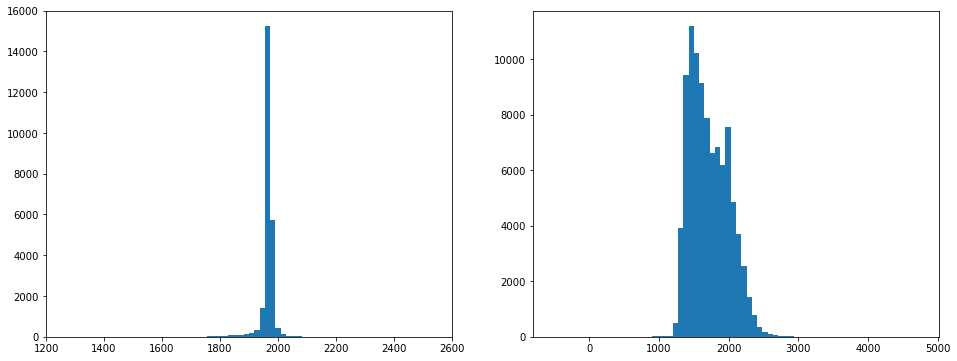

In [15]:
plt.subplot(1,2,1)
plt.hist(Ds_constrained_mass_MC,bins=70);
plt.subplot(1,2,2)
plt.hist(Ds_constrained_mass_data,bins=70);
fig = plt.gcf()
fig.set_size_inches(16,6)

In [16]:
data_bkg_indices_over=[]
data_bkg_indices_under=[]

MC_sig_indices=[]

In [17]:
for i in range(len(data_tuple_dict["Ds_ConsD_M"])):
    #retrieving the Ds reconstructed mass
    Ds_m = data_tuple_dict["Ds_ConsD_M"][i][0]
    
    #selecting the out of signal regions
    if 0<Ds_m<1850:
        data_bkg_indices_under.append(i)
    if 2100 < Ds_m < 2600:
        data_bkg_indices_over.append(i)

In [18]:
for i in range(len(MC_tuple_dict["Ds_ConsD_M"])):
    #retrieving the Ds reconstructed mass
    Ds_m = MC_tuple_dict["Ds_ConsD_M"][i][0]
    
    #selecting the out of signal regions
    if 1850<Ds_m<2100:
        MC_sig_indices.append(i)

In [19]:
data_tuple_bkg_under = {}
data_tuple_bkg_over = {}
MC_tuple_sig ={}

for label in branches_needed:
    
    data_tuple_bkg_under[label] = data_tuple_dict[label][data_bkg_indices_under]
    data_tuple_bkg_over[label] = data_tuple_dict[label][data_bkg_indices_over]
    MC_tuple_sig[label] = MC_tuple_dict[label][MC_sig_indices]
    

In [20]:
nbins=70
MC_Ds_endvtx_chi2ratio=MC_tuple_dict["Ds_ENDVERTEX_CHI2"]/MC_tuple_dict["Ds_ENDVERTEX_NDOF"]
data_under_Ds_endvtx_chi2ratio=data_tuple_bkg_under["Ds_ENDVERTEX_CHI2"]/data_tuple_bkg_under["Ds_ENDVERTEX_NDOF"]
data_over_Ds_endvtx_chi2ratio=data_tuple_bkg_over["Ds_ENDVERTEX_CHI2"]/data_tuple_bkg_over["Ds_ENDVERTEX_NDOF"]

In [21]:
if np.max(MC_Ds_endvtx_chi2ratio)>np.max(data_under_Ds_endvtx_chi2ratio):
    max_endvchi2_under=np.max(MC_Ds_endvtx_chi2ratio)
else:
    max_endvchi2_under=np.max(data_under_Ds_endvtx_chi2ratio)
    
if np.max(MC_Ds_endvtx_chi2ratio)>np.max(data_over_Ds_endvtx_chi2ratio):
    max_endvchi2_over=np.max(MC_Ds_endvtx_chi2ratio)
else:
    max_endvchi2_over=np.max(data_over_Ds_endvtx_chi2ratio)

In [22]:
h_mc_under= r.TH1F("Ds end vertex MC/data comparison under", "Ds end vertex MC/data under Ds mass comparison",nbins, 0, max_endvchi2_under)
h_mc_over = r.TH1F("Ds end vertex MC/data comparison over", "Ds end vertex MC/data over Ds mass comparison",nbins, 0, max_endvchi2_over)

for i in range(len(MC_Ds_endvtx_chi2ratio)):
    h_mc_under.Fill(MC_Ds_endvtx_chi2ratio[i])
    h_mc_over.Fill(MC_Ds_endvtx_chi2ratio[i])

n1=h_mc_under.Integral("width")
h_mc_under.Scale(1/n1)
h_mc_under.Integral("width");
n2=h_mc_over.Integral("width")
h_mc_over.Scale(1/n2)
h_mc_over.Integral("width");

In [23]:
h_data_under= r.TH1F("data below signal", "data below signal",nbins, 0, max_endvchi2_under)
h_data_over= r.TH1F("data over signal", "data over signal",nbins, 0, max_endvchi2_over)
for i in range(len(data_under_Ds_endvtx_chi2ratio)):
    h_data_under.Fill(data_under_Ds_endvtx_chi2ratio[i])
for i in range(len(data_over_Ds_endvtx_chi2ratio)):
    h_data_over.Fill(data_over_Ds_endvtx_chi2ratio[i])
    
    
n2=h_data_under.Integral("width")
h_data_under.Scale(1/n2)
h_data_under.Integral("width");
n3=h_data_over.Integral("width")
h_data_over.Scale(1/n3)
h_data_over.Integral("width");

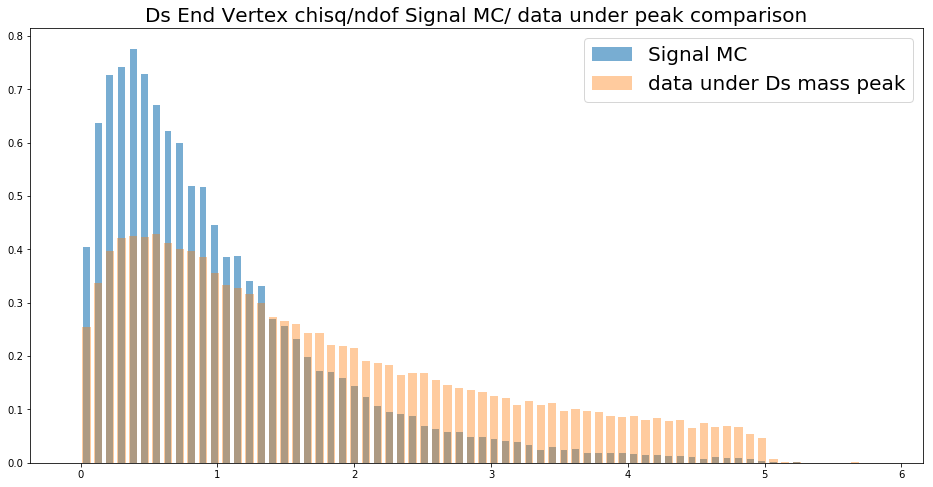

In [31]:
a=[h_mc_under.GetBinContent(i) for i in range(nbins)]
b=[h_mc_under.GetBinCenter(i) for i in range(nbins)]
c=[h_data_under.GetBinContent(i) for i in range(nbins)]
d=[h_data_under.GetBinCenter(i) for i in range(nbins)]
plt.title("Ds End Vertex chisq/ndof Signal MC/ data under peak comparison", fontsize=20)

plt.bar(b,a,width=0.05,alpha=0.6,label="Signal MC")
plt.bar(d,c,width=0.06, alpha=0.4, label="data under Ds mass peak")
plt.legend(fontsize=20)
fig = plt.gcf()
fig.set_size_inches(16,8)

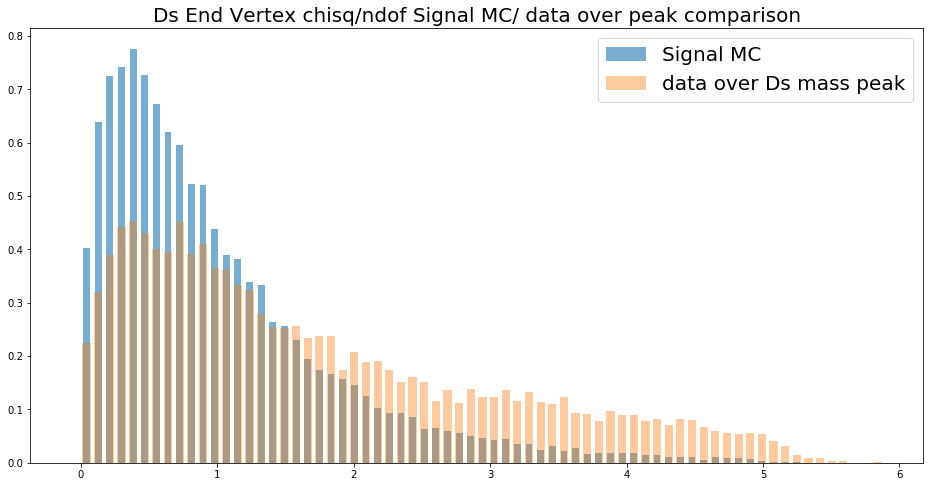

In [32]:
a=[h_mc_over.GetBinContent(i) for i in range(nbins)]
b=[h_mc_over.GetBinCenter(i) for i in range(nbins)]
c=[h_data_over.GetBinContent(i) for i in range(nbins)]
d=[h_data_over.GetBinCenter(i) for i in range(nbins)]

plt.title("Ds End Vertex chisq/ndof Signal MC/ data over peak comparison", fontsize=20)
plt.bar(b,a,width=0.05,alpha=0.6,label="Signal MC")
plt.bar(d,c,width=0.06, alpha=0.4, label="data over Ds mass peak")
plt.legend(fontsize=20)
fig = plt.gcf()
fig.set_size_inches(16,8)

In [20]:
nbins=70
MC_Ds_ownvtx_chi2ratio=MC_tuple_dict["Ds_OWNPV_CHI2"]/MC_tuple_dict["Ds_OWNPV_NDOF"]
data_under_Ds_ownvtx_chi2ratio=data_tuple_bkg_under["Ds_OWNPV_CHI2"]/data_tuple_bkg_under["Ds_OWNPV_NDOF"]
data_over_Ds_ownvtx_chi2ratio=data_tuple_bkg_over["Ds_OWNPV_CHI2"]/data_tuple_bkg_over["Ds_OWNPV_NDOF"]

In [21]:
if np.max(MC_Ds_ownvtx_chi2ratio)>np.max(data_under_Ds_ownvtx_chi2ratio):
    max_ownvchi2_under=np.max(MC_Ds_ownvtx_chi2ratio)
else:
    max_ownvchi2_under=np.max(data_under_Ds_ownvtx_chi2ratio)
    
if np.max(MC_Ds_ownvtx_chi2ratio)>np.max(data_over_Ds_ownvtx_chi2ratio):
    max_ownvchi2_over=np.max(MC_Ds_ownvtx_chi2ratio)
else:
    max_ownvchi2_over=np.max(data_over_Ds_ownvtx_chi2ratio)

In [22]:
h_mc_under= r.TH1F("Ds own PV vertex MC/data comparison under", "Ds own PV vertex MC/data under Ds mass comparison",nbins, 0, max_ownvchi2_under)
h_mc_over = r.TH1F("Ds own PV vertex MC/data comparison over", "Ds own PV vertex MC/data over Ds mass comparison",nbins, 0, max_ownvchi2_over)

for i in range(len(MC_Ds_ownvtx_chi2ratio)):
    h_mc_under.Fill(MC_Ds_ownvtx_chi2ratio[i])
    h_mc_over.Fill(MC_Ds_ownvtx_chi2ratio[i])

n1=h_mc_under.Integral("width")
h_mc_under.Scale(1/n1)
h_mc_under.Integral("width");
n2=h_mc_over.Integral("width")
h_mc_over.Scale(1/n2)
h_mc_over.Integral("width");

In [37]:
h_data_under= r.TH1F("data below signal", "data below signal",nbins, 0, max_ownvchi2_under)
h_data_over= r.TH1F("data over signal", "data over signal",nbins, 0, max_ownvchi2_over)
for i in range(len(data_under_Ds_ownvtx_chi2ratio)):
    h_data_under.Fill(data_under_Ds_ownvtx_chi2ratio[i])
for i in range(len(data_over_Ds_ownvtx_chi2ratio)):
    h_data_over.Fill(data_over_Ds_ownvtx_chi2ratio[i])
    
    
n2=h_data_under.Integral("width")
h_data_under.Scale(1/n2)
h_data_under.Integral("width");
n3=h_data_over.Integral("width")
h_data_over.Scale(1/n3)
h_data_over.Integral("width");

TFile::Append:0: RuntimeWarning: Replacing existing TH1: data below signal (Potential memory leak).
TFile::Append:0: RuntimeWarning: Replacing existing TH1: data over signal (Potential memory leak).


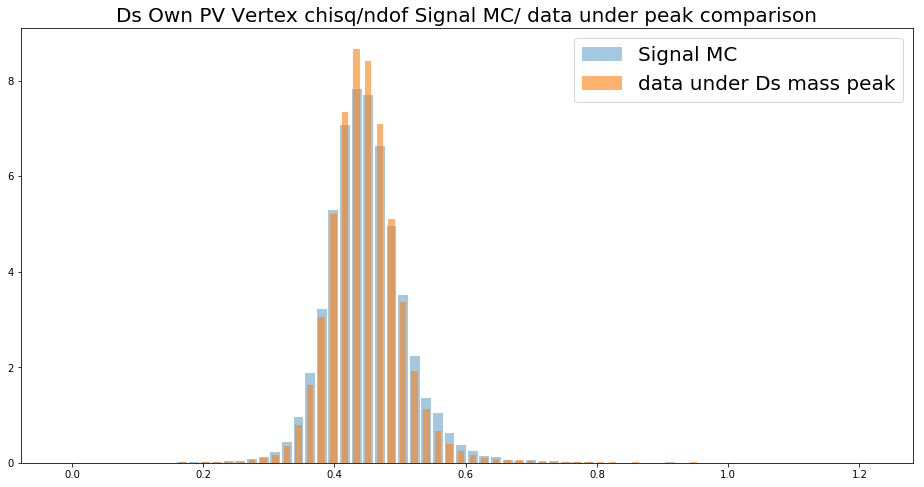

In [30]:
a=[h_mc_under.GetBinContent(i) for i in range(nbins)]
b=[h_mc_under.GetBinCenter(i) for i in range(nbins)]
c=[h_data_under.GetBinContent(i) for i in range(nbins)]
d=[h_data_under.GetBinCenter(i) for i in range(nbins)]
plt.title("Ds Own PV Vertex chisq/ndof Signal MC/ data under peak comparison", fontsize=20)

plt.bar(b,a,width=0.015,alpha=0.4,label="Signal MC")
plt.bar(d,c,width=0.01, alpha=0.6, label="data under Ds mass peak")
plt.legend(fontsize=20)
fig = plt.gcf()
fig.set_size_inches(16,8)

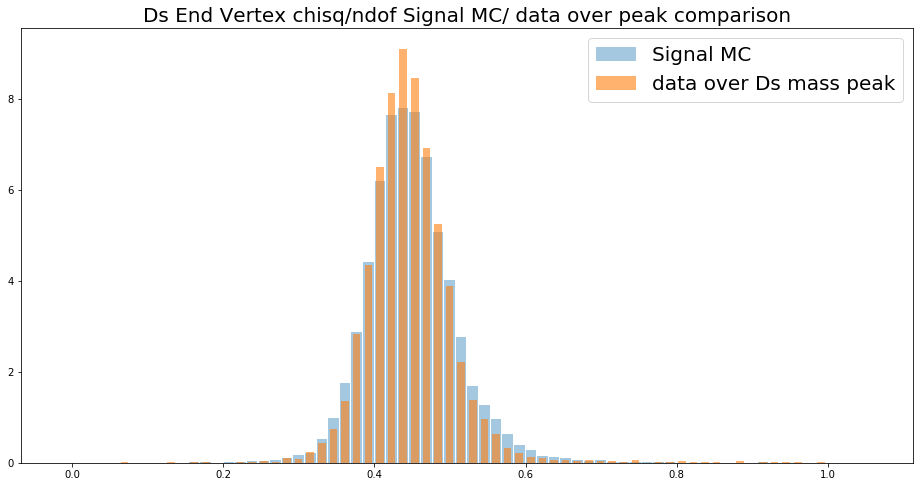

In [28]:
a=[h_mc_over.GetBinContent(i) for i in range(nbins)]
b=[h_mc_over.GetBinCenter(i) for i in range(nbins)]
c=[h_data_over.GetBinContent(i) for i in range(nbins)]
d=[h_data_over.GetBinCenter(i) for i in range(nbins)]

plt.title("Ds Own PV Vertex chisq/ndof Signal MC/ data over peak comparison", fontsize=20)
plt.bar(b,a,width=0.014,alpha=0.4,label="Signal MC")
plt.bar(d,c,width=0.01, alpha=0.6, label="data over Ds mass peak")
plt.legend(fontsize=20)
fig = plt.gcf()
fig.set_size_inches(16,8)

In [34]:
nbins=70
MC_Ds_DIRA_ownpv=MC_tuple_dict["Ds_DIRA_OWNPV"]
data_under_Ds_DIRA_ownpv=data_tuple_bkg_under["Ds_DIRA_OWNPV"]
data_over_Ds_DIRA_ownpv=data_tuple_bkg_over["Ds_DIRA_OWNPV"]

In [35]:
if np.min(MC_Ds_DIRA_ownpv)<np.min(data_under_Ds_DIRA_ownpv):
    min_DIRA_under=np.min(MC_Ds_DIRA_ownpv)
else:
    min_DIRA_under=np.min(data_under_Ds_DIRA_ownpv)
    
if np.min(MC_Ds_DIRA_ownpv)<np.min(data_over_Ds_DIRA_ownpv):
    min_DIRA_over=np.min(MC_Ds_DIRA_ownpv)
else:
    min_DIRA_over=np.min(data_over_Ds_DIRA_ownpv)

In [36]:
min_DIRA_under=0.99980
min_DIRA_over=0.99980

In [37]:
h_mc_under= r.TH1F("Ds DIRA own PV MC/data comparison under", "Ds DIRAown PV MC/data under Ds mass comparison",nbins, min_DIRA_under, 1)
h_mc_over = r.TH1F("Ds DIRA own PV MC/data comparison over", "Ds DIRA own PV MC/data over Ds mass comparison",nbins, min_DIRA_over, 1)

for i in range(len(MC_Ds_DIRA_ownpv)):
    h_mc_under.Fill(MC_Ds_DIRA_ownpv[i])
    h_mc_over.Fill(MC_Ds_DIRA_ownpv[i])

n1=h_mc_under.Integral("width")
h_mc_under.Scale(1/n1)
h_mc_under.Integral("width");
n2=h_mc_over.Integral("width")
h_mc_over.Scale(1/n2)
h_mc_over.Integral("width");

In [38]:
h_data_under= r.TH1F("data below signal", "data below signal",nbins, min_DIRA_under, 1)
h_data_over= r.TH1F("data over signal", "data over signal",nbins, min_DIRA_over, 1)
for i in range(len(data_under_Ds_DIRA_ownpv)):
    h_data_under.Fill(data_under_Ds_DIRA_ownpv[i])
for i in range(len(data_over_Ds_DIRA_ownpv)):
    h_data_over.Fill(data_over_Ds_DIRA_ownpv[i])
    
n2=h_data_under.Integral("width")
h_data_under.Scale(1/n2)
h_data_under.Integral("width");
n3=h_data_over.Integral("width")
h_data_over.Scale(1/n3)
h_data_over.Integral("width");

TFile::Append:0: RuntimeWarning: Replacing existing TH1: data below signal (Potential memory leak).
TFile::Append:0: RuntimeWarning: Replacing existing TH1: data over signal (Potential memory leak).


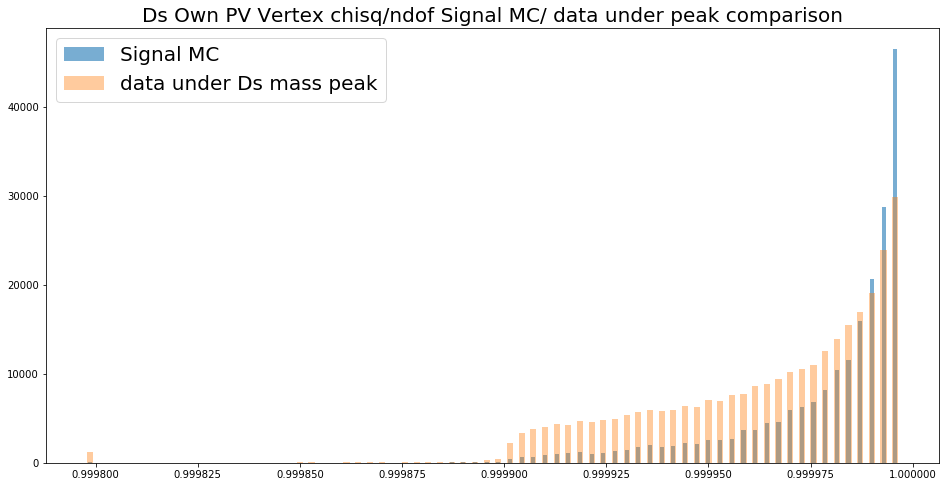

In [41]:
a=[h_mc_under.GetBinContent(i) for i in range(nbins)]
b=[h_mc_under.GetBinCenter(i) for i in range(nbins)]
c=[h_data_under.GetBinContent(i) for i in range(nbins)]
d=[h_data_under.GetBinCenter(i) for i in range(nbins)]
plt.title("Ds Own PV Vertex chisq/ndof Signal MC/ data under peak comparison", fontsize=20)

plt.bar(b,a,width=0.000001,alpha=0.6,label="Signal MC")
plt.bar(d,c,width=0.0000015, alpha=0.4, label="data under Ds mass peak")
plt.legend(fontsize=20)
fig = plt.gcf()
fig.set_size_inches(16,8)

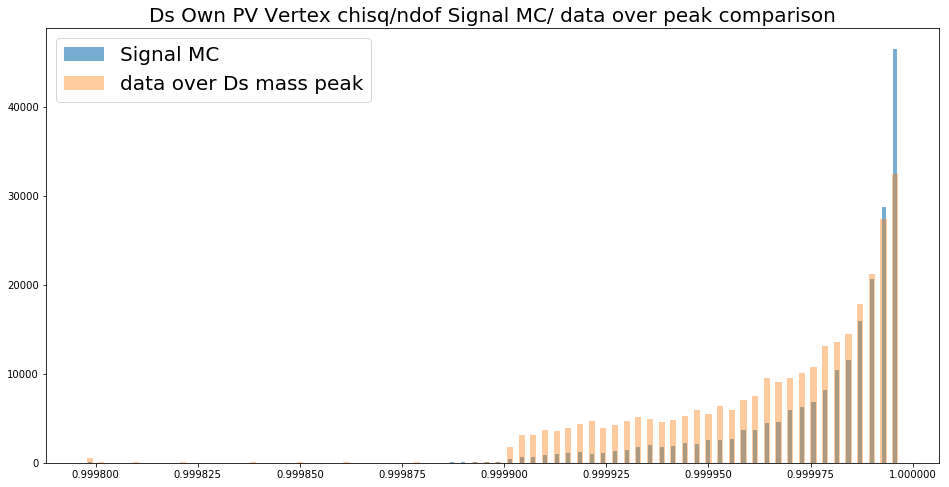

In [42]:
a=[h_mc_over.GetBinContent(i) for i in range(nbins)]
b=[h_mc_over.GetBinCenter(i) for i in range(nbins)]
c=[h_data_over.GetBinContent(i) for i in range(nbins)]
d=[h_data_over.GetBinCenter(i) for i in range(nbins)]

plt.title("Ds Own PV Vertex chisq/ndof Signal MC/ data over peak comparison", fontsize=20)
plt.bar(b,a,width=0.000001,alpha=0.6,label="Signal MC")
plt.bar(d,c,width=0.0000015, alpha=0.4, label="data over Ds mass peak")
plt.legend(fontsize=20)
fig = plt.gcf()
fig.set_size_inches(16,8)

In [44]:
nbins=70
MC_probNNmu=MC_tuple_dict["mu_plus_MC15TuneV1_ProbNNmu"]
data_probNNmu_under=data_tuple_bkg_under["mu_plus_MC15TuneV1_ProbNNmu"]
data_probNNmu_over=data_tuple_bkg_over["mu_plus_MC15TuneV1_ProbNNmu"]

In [50]:
h_mc= r.TH1F("ProbNN mu MC/data comparison under", "ProbNN mu MC/data under Ds mass comparison",nbins, 0, 1)

for i in range(len(MC_probNNmu)):
    h_mc.Fill(MC_probNNmu[i]) 

n1=h_mc.Integral("width")
h_mc.Scale(1/n1)
h_mc.Integral("width");

TFile::Append:0: RuntimeWarning: Replacing existing TH1: ProbNN mu MC/data comparison under (Potential memory leak).


In [51]:
h_data_under= r.TH1F("data below signal", "data below signal",nbins, 0, 1)
h_data_over= r.TH1F("data over signal", "data over signal",nbins, 0, 1)
for i in range(len(data_probNNmu_under)):
    h_data_under.Fill(data_probNNmu_under[i])
for i in range(len(data_probNNmu_over)):
    h_data_over.Fill(data_probNNmu_under[i])
    
n2=h_data_under.Integral("width")
h_data_under.Scale(1/n2)
h_data_under.Integral("width");
n3=h_data_over.Integral("width")
h_data_over.Scale(1/n3)
h_data_over.Integral("width");

TFile::Append:0: RuntimeWarning: Replacing existing TH1: data below signal (Potential memory leak).
TFile::Append:0: RuntimeWarning: Replacing existing TH1: data over signal (Potential memory leak).


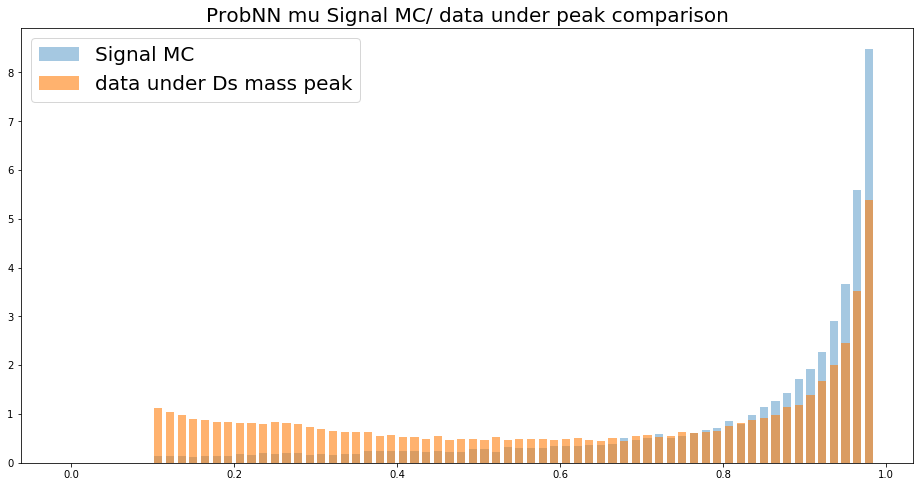

In [55]:
a=[h_mc.GetBinContent(i) for i in range(nbins)]
b=[h_mc.GetBinCenter(i) for i in range(nbins)]
c=[h_data_under.GetBinContent(i) for i in range(nbins)]
d=[h_data_under.GetBinCenter(i) for i in range(nbins)]
plt.title("ProbNN mu Signal MC/ data under peak comparison", fontsize=20)

plt.bar(b,a,width=0.01,alpha=0.4,label="Signal MC")
plt.bar(d,c,width=0.01, alpha=0.6, label="data under Ds mass peak")
plt.legend(fontsize=20)
fig = plt.gcf()
fig.set_size_inches(16,8)

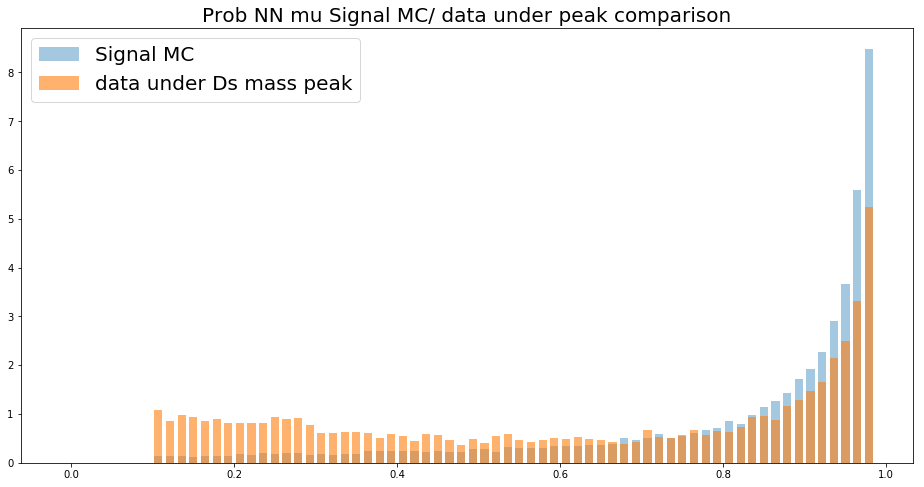

In [56]:
a=[h_mc.GetBinContent(i) for i in range(nbins)]
b=[h_mc.GetBinCenter(i) for i in range(nbins)]
c=[h_data_over.GetBinContent(i) for i in range(nbins)]
d=[h_data_over.GetBinCenter(i) for i in range(nbins)]
plt.title("Prob NN mu Signal MC/ data under peak comparison", fontsize=20)

plt.bar(b,a,width=0.01,alpha=0.4,label="Signal MC")
plt.bar(d,c,width=0.01, alpha=0.6, label="data under Ds mass peak")
plt.legend(fontsize=20)
fig = plt.gcf()
fig.set_size_inches(16,8)

In [63]:
nbins=4
MC_Hlt1TrackMVA_TOS=MC_tuple_dict["Ds_Hlt1TrackMVADecision_TOS"]
data_Hlt1TrackMVA_TOS_under=data_tuple_bkg_under["Ds_Hlt1TrackMVADecision_TOS"]
data_Hlt1TrackMVA_TOS_over=data_tuple_bkg_over["Ds_Hlt1TrackMVADecision_TOS"]

In [64]:
h_mc= r.TH1F("Hlt1 TrackMVA TOS MC/data comparison under", "Hlt1 TrackMVA TOS MC/data under Ds mass comparison",nbins, 0, 2)

for i in range(len(MC_Hlt1TrackMVA_TOS)):
    h_mc.Fill(MC_Hlt1TrackMVA_TOS[i]) 

n1=h_mc.Integral("width")
h_mc.Scale(1/n1)
h_mc.Integral("width");

TFile::Append:0: RuntimeWarning: Replacing existing TH1: ProbNN mu MC/data comparison under (Potential memory leak).


In [65]:
h_data_under= r.TH1F("data below signal", "data below signal",nbins, 0, 2)
h_data_over= r.TH1F("data over signal", "data over signal",nbins, 0, 2)
for i in range(len(data_Hlt1TrackMVA_TOS_under)):
    h_data_under.Fill(data_Hlt1TrackMVA_TOS_under[i])
for i in range(len(data_Hlt1TrackMVA_TOS_over)):
    h_data_over.Fill(data_Hlt1TrackMVA_TOS_over[i])
    
n2=h_data_under.Integral("width")
h_data_under.Scale(1/n2)
h_data_under.Integral("width");
n3=h_data_over.Integral("width")
h_data_over.Scale(1/n3)
h_data_over.Integral("width");

TFile::Append:0: RuntimeWarning: Replacing existing TH1: data below signal (Potential memory leak).
TFile::Append:0: RuntimeWarning: Replacing existing TH1: data over signal (Potential memory leak).


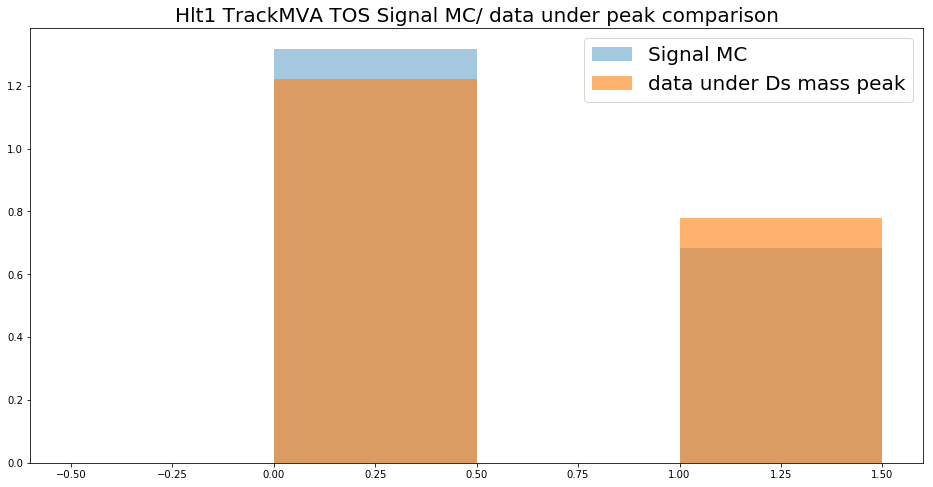

In [72]:
a=[h_mc.GetBinContent(i) for i in range(nbins)]
b=[h_mc.GetBinCenter(i) for i in range(nbins)]
c=[h_data_under.GetBinContent(i) for i in range(nbins)]
d=[h_data_under.GetBinCenter(i) for i in range(nbins)]
plt.title("Hlt1 TrackMVA TOS Signal MC/ data under peak comparison", fontsize=20)

plt.bar(b,a,width=0.5,alpha=0.4,label="Signal MC")
plt.bar(d,c,width=0.5, alpha=0.6, label="data under Ds mass peak")
plt.legend(fontsize=20)
fig = plt.gcf()
fig.set_size_inches(16,8)

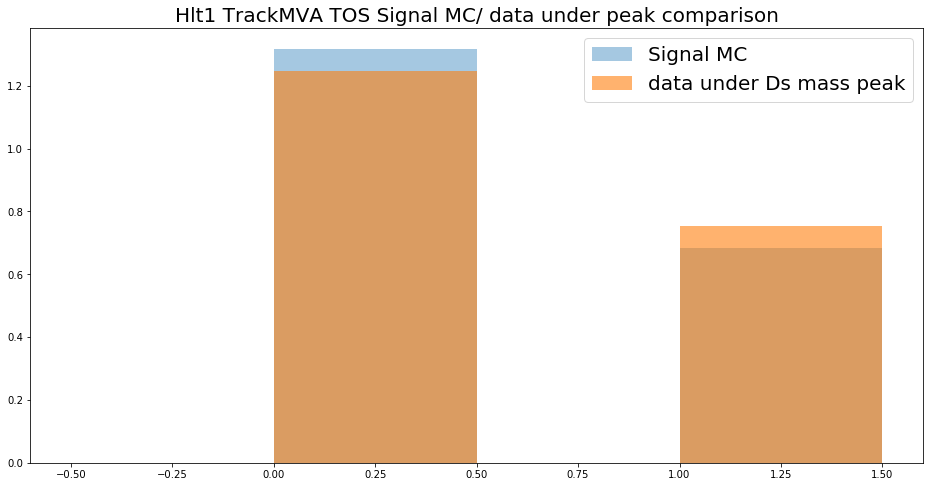

In [73]:
a=[h_mc.GetBinContent(i) for i in range(nbins)]
b=[h_mc.GetBinCenter(i) for i in range(nbins)]
c=[h_data_over.GetBinContent(i) for i in range(nbins)]
d=[h_data_over.GetBinCenter(i) for i in range(nbins)]
plt.title("Hlt1 TrackMVA TOS Signal MC/ data under peak comparison", fontsize=20)

plt.bar(b,a,width=0.5,alpha=0.4,label="Signal MC")
plt.bar(d,c,width=0.5, alpha=0.6, label="data under Ds mass peak")
plt.legend(fontsize=20)
fig = plt.gcf()
fig.set_size_inches(16,8)

In [74]:
nbins=4
MC_Hlt2RareCharm_TOS=MC_tuple_dict["Ds_Hlt2RareCharmD2PiMuMuOSDecision_TOS"]
data_Hlt2RareCharm_TOS_under=data_tuple_bkg_under["Ds_Hlt2RareCharmD2PiMuMuOSDecision_TOS"]
data_Hlt2RareCharm_TOS_over=data_tuple_bkg_over["Ds_Hlt2RareCharmD2PiMuMuOSDecision_TOS"]

In [75]:
h_mc= r.TH1F("Hlt2 RareCharm TOS MC/data comparison under", "Hlt2 RareCharm TOS MC/data under Ds mass comparison",nbins, 0, 2)

for i in range(len(MC_Hlt2RareCharm_TOS)):
    h_mc.Fill(MC_Hlt2RareCharm_TOS[i]) 

n1=h_mc.Integral("width")
h_mc.Scale(1/n1)
h_mc.Integral("width");

In [76]:
h_data_under= r.TH1F("data below signal", "data below signal",nbins, 0, 2)
h_data_over= r.TH1F("data over signal", "data over signal",nbins, 0, 2)
for i in range(len(data_Hlt2RareCharm_TOS_under)):
    h_data_under.Fill(data_Hlt2RareCharm_TOS_under[i])
for i in range(len(data_Hlt2RareCharm_TOS_over)):
    h_data_over.Fill(data_Hlt2RareCharm_TOS_over[i])
    
n2=h_data_under.Integral("width")
h_data_under.Scale(1/n2)
h_data_under.Integral("width");
n3=h_data_over.Integral("width")
h_data_over.Scale(1/n3)
h_data_over.Integral("width");

TFile::Append:0: RuntimeWarning: Replacing existing TH1: data below signal (Potential memory leak).
TFile::Append:0: RuntimeWarning: Replacing existing TH1: data over signal (Potential memory leak).


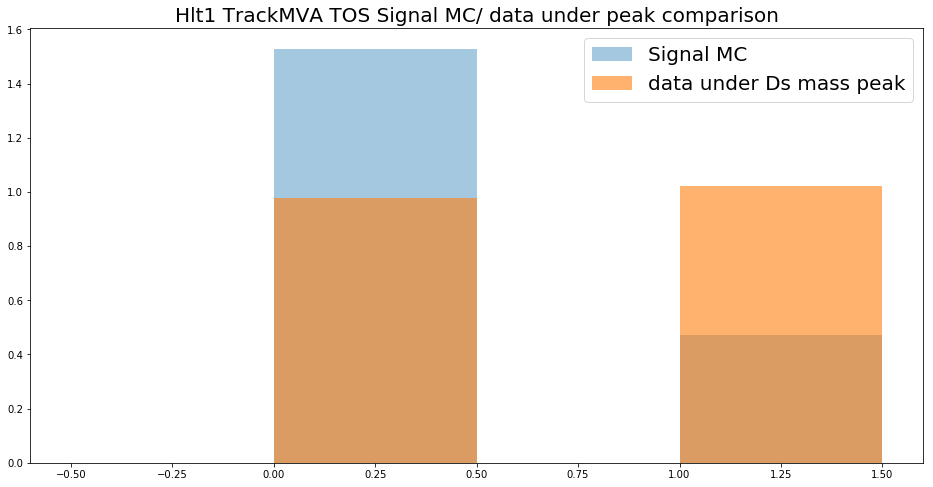

In [77]:
a=[h_mc.GetBinContent(i) for i in range(nbins)]
b=[h_mc.GetBinCenter(i) for i in range(nbins)]
c=[h_data_under.GetBinContent(i) for i in range(nbins)]
d=[h_data_under.GetBinCenter(i) for i in range(nbins)]
plt.title("Hlt1 TrackMVA TOS Signal MC/ data under peak comparison", fontsize=20)

plt.bar(b,a,width=0.5,alpha=0.4,label="Signal MC")
plt.bar(d,c,width=0.5, alpha=0.6, label="data under Ds mass peak")
plt.legend(fontsize=20)
fig = plt.gcf()
fig.set_size_inches(16,8)

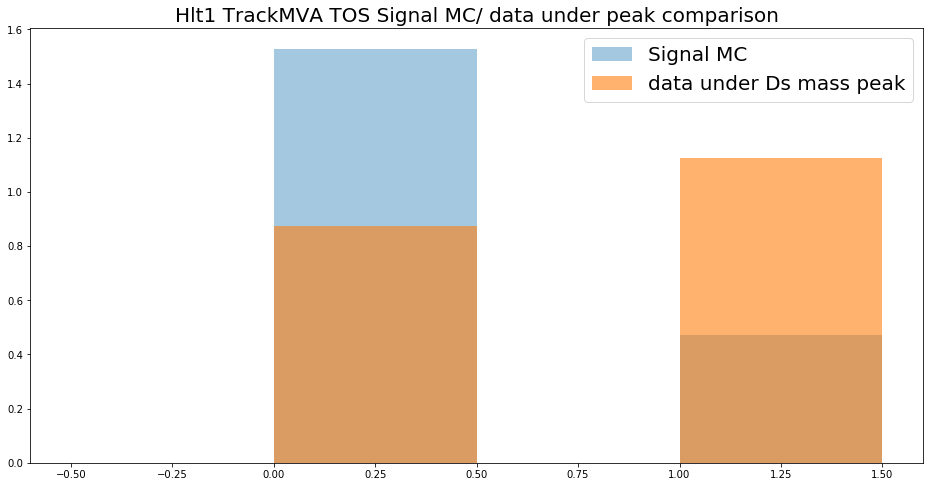

In [78]:
a=[h_mc.GetBinContent(i) for i in range(nbins)]
b=[h_mc.GetBinCenter(i) for i in range(nbins)]
c=[h_data_over.GetBinContent(i) for i in range(nbins)]
d=[h_data_over.GetBinCenter(i) for i in range(nbins)]
plt.title("Hlt1 TrackMVA TOS Signal MC/ data under peak comparison", fontsize=20)

plt.bar(b,a,width=0.5,alpha=0.4,label="Signal MC")
plt.bar(d,c,width=0.5, alpha=0.6, label="data under Ds mass peak")
plt.legend(fontsize=20)
fig = plt.gcf()
fig.set_size_inches(16,8)

In [79]:
nbins=4
MC_Hlt2Phys_TOS=MC_tuple_dict["Ds_Hlt2Phys_TOS"]
data_Hlt2Phys_TOS_under=data_tuple_bkg_under["Ds_Hlt2Phys_TOS"]
data_Hlt2Phys_TOS_over=data_tuple_bkg_over["Ds_Hlt2Phys_TOS"]

In [80]:
h_mc= r.TH1F("Hlt2 Phys TOS MC/data comparison under", "Hlt2 Phys TOS MC/data under Ds mass comparison",nbins, 0, 2)

for i in range(len(MC_Hlt2Phys_TOS)):
    h_mc.Fill(MC_Hlt2Phys_TOS[i]) 

n1=h_mc.Integral("width")
h_mc.Scale(1/n1)
h_mc.Integral("width");

In [81]:
h_data_under= r.TH1F("data below signal", "data below signal",nbins, 0, 2)
h_data_over= r.TH1F("data over signal", "data over signal",nbins, 0, 2)
for i in range(len(data_Hlt2Phys_TOS_under)):
    h_data_under.Fill(data_Hlt2Phys_TOS_under[i])
for i in range(len(data_Hlt2Phys_TOS_under)):
    h_data_over.Fill(data_Hlt2Phys_TOS_under[i])
    
n2=h_data_under.Integral("width")
h_data_under.Scale(1/n2)
h_data_under.Integral("width");
n3=h_data_over.Integral("width")
h_data_over.Scale(1/n3)
h_data_over.Integral("width");

TFile::Append:0: RuntimeWarning: Replacing existing TH1: data below signal (Potential memory leak).
TFile::Append:0: RuntimeWarning: Replacing existing TH1: data over signal (Potential memory leak).


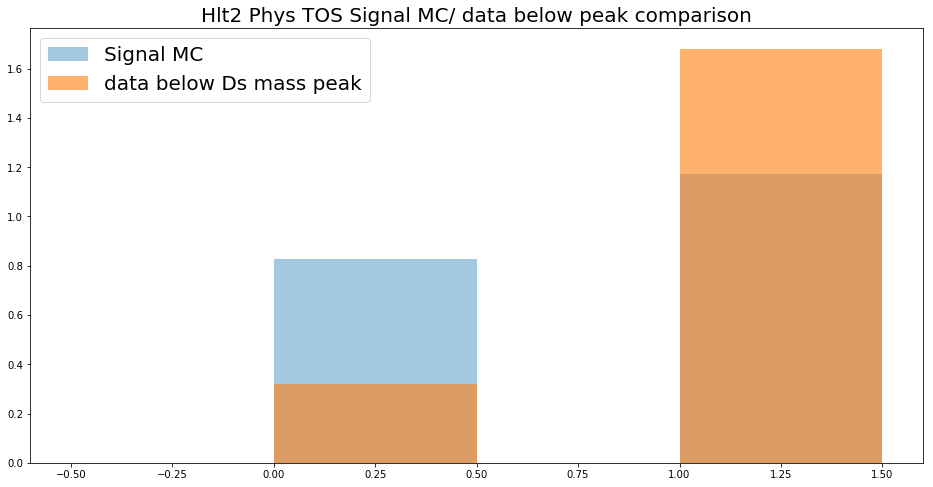

In [86]:
a=[h_mc.GetBinContent(i) for i in range(nbins)]
b=[h_mc.GetBinCenter(i) for i in range(nbins)]
c=[h_data_under.GetBinContent(i) for i in range(nbins)]
d=[h_data_under.GetBinCenter(i) for i in range(nbins)]
plt.title("Hlt2 Phys TOS Signal MC/ data below peak comparison", fontsize=20)

plt.bar(b,a,width=0.5,alpha=0.4,label="Signal MC")
plt.bar(d,c,width=0.5, alpha=0.6, label="data below Ds mass peak")
plt.legend(fontsize=20)
fig = plt.gcf()
fig.set_size_inches(16,8)

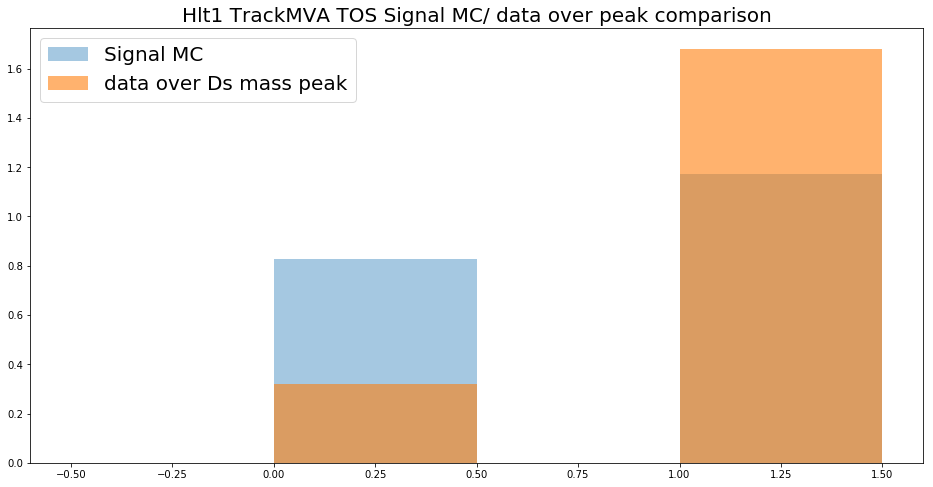

In [87]:
a=[h_mc.GetBinContent(i) for i in range(nbins)]
b=[h_mc.GetBinCenter(i) for i in range(nbins)]
c=[h_data_over.GetBinContent(i) for i in range(nbins)]
d=[h_data_over.GetBinCenter(i) for i in range(nbins)]
plt.title("Hlt1 TrackMVA TOS Signal MC/ data over peak comparison", fontsize=20)

plt.bar(b,a,width=0.5,alpha=0.4,label="Signal MC")
plt.bar(d,c,width=0.5, alpha=0.6, label="data over Ds mass peak")
plt.legend(fontsize=20)
fig = plt.gcf()
fig.set_size_inches(16,8)

In [ ]:
#h_data_under.SetLineColor(38)
#h_mc_under.SetLineColor(46)
#
#c1=r.TCanvas("c1","c1",1200,700)
#r.gStyle.SetOptStat(0)
#h_mc_under.Draw()
#h_data_under.Draw("same")
#
#legend = r.TLegend(0.9,0.8,0.6,0.9)
#legend.SetHeader("Ds End vertex chi2")
#legend.AddEntry(h_mc_under,"Signal MC","L")
#legend.AddEntry(h_data_under,"data below Ds reco mass MC","L")
#legend.Draw()
#c1.Update()
#c1.SaveAs("/home/hep/davide/Rphipi/plt.pdf")